## Numerical Analysis Exercise 2 (March 22th 2023)

Deadline for submission: March 25th 2023

### Task 1 (2 + 3 + 10 + 3 + 2 P)
Solve a two-dimensional Poisson problem using the finite difference method. Consider the following boundary value problem

\begin{aligned}
-\Delta u &= f \quad \text{ in }\Omega=(0,1) \times (0,1)\\
u&=0 \quad \text{ on }\partial\Omega
\end{aligned}

with $f(x,y) = 2 \pi^2 sin(\pi x)sin(\pi y)$.

In this task, as in the lecture, $h$ is the distance between two neighbouring grid points. Then, $\ell-1$ is the number of grid points of $\Omega_h$ in each dimension, $1/h = \ell$, and the number of grid points is $(\ell -1)^2$. The discrete domain (grid) $\Omega_h$ is then given by 

\begin{equation*}
(x_i, y_j) \in \Omega_h \quad i,j =1,\dots,\ell-1.
\end{equation*}

### 2. Discretize the problem using the finite difference method and write the resulting system $A_h \boldsymbol u_h = \boldsymbol q_h$ for $h = 1/4$ with pen and paper. You may write the solution here.


Let $x_{i}=ih$,$y_{j}=jh$, $i,j=1,...l-1$

Since $h=\dfrac{1}{4}$, $l=4$

Set $u_{i,j}=u(x_{i},y_{j})$ and $f_{i,j}=f(x_{i},y_{j})$.

We denote by $u_{x}(x,y)$ the function $u(x,y)$ where $y$ is fixed ie considered as a constant, and by $u_{y}(x,y)$ the function $u(x,y)$ where $x$ is fixed ie considered as a constant.

By the Lemma 1.2:

$$\dfrac{\partial^2 u}{\partial x^2}   =u''_{x}(x,y)\approx \dfrac{u(x-h,y)-2u(x,y)+u(x+h,y)}{h^2}$$
$$\dfrac{\partial^2 u}{\partial y^2} =u''_{y}(x,y)\approx \dfrac{u(x,y-h)-2u(x,y)+u(x,y+h)}{h^2}$$
 
Then ,
$$-\Delta u(x,y)\approx - \dfrac{u(x-h,y)-2u(x,y)+u(x+h,y)}{h^2} -\dfrac{u(x,y-h)-2u(x,y)+u(x,y+h)}{h^2}$$

So,
\begin{align*}
-\Delta u(x_{i},y_{j})=-\Delta u_{i,j}&= - \dfrac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h^2} -\dfrac{u_{i,j-1}-2u_{i,j}+u_{i,j+1}}{h^2}\\
&=\dfrac{-u_{i-1,j}+2u_{i,j}-u_{i+1,j}-u_{i,j-1}+2u_{i,j}-u_{i,j+1}}{h^2} \\
&=\dfrac{-u_{i-1,j}-u_{i,j-1}+4u_{i,j}-u_{i+1,j}-u_{i,j+1}}{h^2} \\
&=\dfrac{1}{h^2}\left( -u_{i-1,j}-u_{i,j-1}+4u_{i,j}-u_{i+1,j}-u_{i,j+1} \right)
\end{align*}
Since $-\Delta u = f $ we have $-\Delta u_{i,j} = f_{i,j} $ and then,
$$\dfrac{1}{h^2}\left( -u_{i-1,j}-u_{i,j-1}+4u_{i,j}-u_{i+1,j}-u_{i,j+1} \right)=f_{i,j} \ \ i,j=1,2,3$$

We obtain the system $A_{h}u_{h}=q_{h}$ where:
$$A_{h}=\dfrac{1}{h^2}\begin{pmatrix}
T&-I&0\\
-I&T&-I\\
0&-I&T\\
\end{pmatrix} \ \ \text{where} \ \ T=\begin{pmatrix}
4&-1&0\\
-1&4&-1\\
0&-1&4\\
\end{pmatrix} \ \ \text{and} \ \ I=\begin{pmatrix}
1&0&0\\
0&1&0\\
0&0&1\\
\end{pmatrix}$$
$$u_{h}= \begin{pmatrix}
u_{1,1},u_{1,2},u_{1,3},u_{2,1},u_{2,2},u_{2,3},u_{3,1},u_{3,2},u_{3,3}
\end{pmatrix}^T $$
$$q_{h}= \begin{pmatrix}
f_{1,1},f_{1,2},f_{1,3},f_{2,1},f_{2,2},f_{2,3},f_{3,1},f_{3,2},f_{3,3}
\end{pmatrix}^T $$



### 3.  Implement your discretization for general $h \le \tfrac12$ that satsifies that $1/h \in \mathbb{N}$. You may use the code structure below, but you can also change it.


In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm

def u(x,y):
    return (np.sin(np.pi * x) * np.sin(np.pi * y))

def f(x,y):
    return 2 * np.pi**2 * (np.sin(np.pi * x) * np.sin(np.pi * y))

def create_matrix(h):
    # Create matrix A_h here

    M = int(1/h-1)  
    T = np.diag(np.full(M,4)) - np.diag(np.ones(M-1),-1) - np.diag(np.ones(M-1),1)
    I = np.eye(M,M)
    A = np.zeros((M*M, M*M))
    for i in range(M):
        for j in range(M):
            if i == j:
                A[i*M:(i+1)*M, j*M:(j+1)*M] = T
            elif i == j-1:
                A[i*M:(i+1)*M, j*M:(j+1)*M] = -I
            elif i == j+1:
                A[i*M:(i+1)*M, j*M:(j+1)*M] = -I

    return A / h**2

def create_right_hand_side(h):
    # Create vector q_h here
    
    M = int(1 / h-1)
    X = np.linspace(0,1,M+2)[1:M+1]
    Y = np.linspace(0,1,M+2)[1:M+1]

    return np.array([f(x,y) for x in X for y in Y ])

def u_numerical(h):
    
    return np.linalg.solve(create_matrix(h) , create_right_hand_side(h))

def u_analytical(h):
    
    M = int(1 / h-1)
    X = np.linspace(0,1,M+2)[1:M+1]
    Y = np.linspace(0,1,M+2)[1:M+1]
    
    return np.array([u(x,y) for x in X for y in Y ])



In [76]:
h=1/4

print('A_h =')
display(create_matrix(h)) 

print('q_h =')
display(create_right_hand_side(h))

print('u_numerical =')
display(u_numerical(h))

print('u_analytical =')
display(u_analytical(h))

A_h =


array([[ 64., -16.,   0., -16.,  -0.,  -0.,   0.,   0.,   0.],
       [-16.,  64., -16.,  -0., -16.,  -0.,   0.,   0.,   0.],
       [  0., -16.,  64.,  -0.,  -0., -16.,   0.,   0.,   0.],
       [-16.,  -0.,  -0.,  64., -16.,   0., -16.,  -0.,  -0.],
       [ -0., -16.,  -0., -16.,  64., -16.,  -0., -16.,  -0.],
       [ -0.,  -0., -16.,   0., -16.,  64.,  -0.,  -0., -16.],
       [  0.,   0.,   0., -16.,  -0.,  -0.,  64., -16.,   0.],
       [  0.,   0.,   0.,  -0., -16.,  -0., -16.,  64., -16.],
       [  0.,   0.,   0.,  -0.,  -0., -16.,   0., -16.,  64.]])

q_h =


array([ 9.8696044, 13.9577284,  9.8696044, 13.9577284, 19.7392088,
       13.9577284,  9.8696044, 13.9577284,  9.8696044])

u_numerical =


array([0.52651464, 0.74460415, 0.52651464, 0.74460415, 1.05302929,
       0.74460415, 0.52651464, 0.74460415, 0.52651464])

u_analytical =


array([0.5       , 0.70710678, 0.5       , 0.70710678, 1.        ,
       0.70710678, 0.5       , 0.70710678, 0.5       ])


### 4. Calculate the experimental order of convergence (EOC) of your discretization using $h = \tfrac12, \tfrac14, \tfrac18, \tfrac{1}{16}, \dots$ by evaluating the discrete $L^2$-norm (equation (1.18) / page 27 in the Knabner/Angermann book, see Google Drive) of the difference between your analytical and the numerical solution evaluated in the grid points. What is the convergence rate $p$ of your discretization (as in $O(h^p)$)? 

\begin{equation*}
\text{EOC} = \frac{\log\left(\frac{||u^\text{analytical} -u^\text{numerical}_{h}||}{||u^\text{analytical} -u^\text{numerical}_{h/2}||}\right)}{\log(2)}
\end{equation*}


In [73]:
def compute_error( h):
  
    return np.linalg.norm(u_analytical(h)-u_numerical(h))*h

def EOC(h):

    return np.log(compute_error(h)/compute_error(h/2))/np.log(2)
 

h_set=[1/2**i for i in range(1,6)]
Discrete_L2_norms= [compute_error( i) for i in h_set]
EOC=[EOC(i) for i in h_set ]
Dict={'h':h_set,'Discrete_L2_norms':Discrete_L2_norms,'EOC':EOC}
pd.DataFrame(Dict)

,h,Discrete_L2_norms,EOC
0,0.50000,0.116850,2.139800
1,0.25000,0.026515,2.033754
2,0.12500,0.006475,2.008367
3,0.06250,0.001609,2.002087
4,0.03125,0.000402,2.000522


## Therefore,  the convergence rate of our discretization is p=2

### 5. Use matplotlib to plot the solution for $h = \tfrac{1}{64}$. 

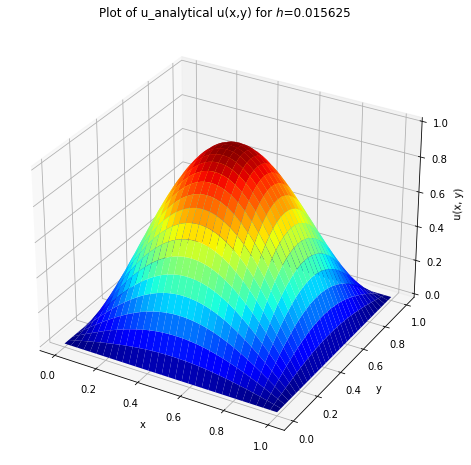

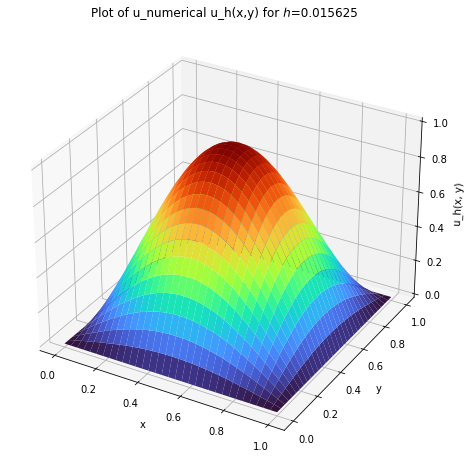

In [74]:
def plot_solution(h):
    # Plot the solution
    
    M = int(1 / h-1)
    x = np.linspace(0, 1, M+2)
    y = np.linspace(0, 1, M+2)
    X, Y = np.meshgrid(x, y)
    
    U = u_analytical(h)
    U = U.reshape((M,M))
    U = np.pad(U,pad_width = 1,mode = 'constant',constant_values=0)
    
    V = u_numerical(h)
    V = V.reshape(M,M)
    V = np.pad(V,pad_width = 1,mode = 'constant',constant_values=0)
    
    # 3D plot of u_analytical
    fit = plt.figure(figsize=(15,8))
    ax = fit.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, U,cmap = 'jet')

    # Labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    ax.set_title(f'Plot of u_analytical u(x,y) for ℎ={h}')
    
    # 3D plot of u_numerical 
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, V,cmap = 'turbo')

    # Labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u_h(x, y)')
    ax.set_title(f'Plot of u_numerical u_h(x,y) for ℎ={h}')

h=1/64  
plot_solution(h)

## Task 2 (3+3 P)
### a) Proof 4) of Lemma 1.2, i.e., show that for $u \in C^4([x-h,x+h])$:

\begin{aligned}
u^{''}(x)=\frac{u(x+h)-2u(x)+u(x-h)}{h^2}+h^2 R \text{ and } |R| \leq \frac{1}{12}||u^{(4)}||_{\infty}
\end{aligned}



By the Taylor expansion there exists $\xi^+$, $\xi^-$  $\in [x-h,x+h]$ such that :


\begin{equation}
u(x+h)=u(x)+hu'(x)+\dfrac{h^2}{2!}u''(x)+\dfrac{h^3}{3!}u^{(3)}(x)+\dfrac{h^4}{4!}u^{(4)}(\xi^+)
\end{equation}

\begin{equation}
u(x-h)=u(x)-hu'(x)+\dfrac{h^2}{2!}u''(x)-\dfrac{h^3}{3!}u^{(3)}(x)+\dfrac{h^4}{4!}u^{(4)}(\xi^-)
\end{equation}

Then we have:
\begin{align*}
&u(x+h)+u(x-h)=2u(x)+2\dfrac{h^2}{2!}u''(x)+\dfrac{h^4}{4!}\left(u^{(4)}(\xi^-)+u^{(4)}(\xi^+)\right)\\
\Rightarrow & h^2u''(x)=u(x+h)+u(x-h)-2u(x)-\dfrac{h^4}{4!}\left(u^{(4)}(\xi^-)+u^{(4)}(\xi^+)\right)\\
\Rightarrow & u''(x)=\dfrac{u(x+h)+u(x-h)-2u(x)}{h^2} -\dfrac{h^2}{24}\left(u^{(4)}(\xi^-)+u^{(4)}(\xi^+)\right)\\
\Rightarrow & u''(x)=\dfrac{u(x+h)+u(x-h)-2u(x)}{h^2} +h^2\left(-\dfrac{1}{24}\left(u^{(4)}(\xi^-)+u^{(4)}(\xi^+)\right)\right)\\
\end{align*}
Set $R=-\dfrac{1}{24}\left(u^{(4)}(\xi^-)+u^{(4)}(\xi^+)\right)$, we have:
\begin{align*}
|R|&=\lvert \dfrac{1}{24}\left(u^{(4)}(\xi^-)+u^{(4)}(\xi^+)\right) \rvert\\
&\leq \dfrac{1}{24}\left(|u^{(4)}(\xi^-)|+|u^{(4)}(\xi^+)|\right)\\
&\leq \dfrac{1}{24}\left(\|u^{(4)}\|_{\infty}+\|u^{(4)}\|_{\infty}\right) \ \ \text{because} \ \ |u^{(3)}(\xi^+)|,|u^{(3)}(\xi^-)|\leq |u^{(3)}\|_{\infty}=\sup\limits_{x\in [x-h,x+h]}{|u^{(3)}(x)|}\\
&\leq \dfrac{1}{12}\|u^{(4)}\|_{\infty}
\end{align*}

Therefore $$u''(x)=\dfrac{u(x-h)-2u(x)+u(x+h)}{h^2} +h^2R \ \ \text{where} \ \ |R|\leq \dfrac{1}{12}\|u^{(4)}\|_{\infty}$$

### b) Show that for $u \in C^3([x-h_1,x+h_2])$, there exists $C>0$, such that:

\begin{aligned}
u^{''}(x)=\frac{2}{h_1+h_2}\left[\frac{1}{h_1}u(x-h_1)-\left(\frac{1}{h_1}+\frac{1}{h_2}\right)u(x)+\frac{1}{h_2}u(x+h_2)\right]+ \max{\{h_1,h_2\}}R 
\end{aligned}

$\quad$ and $|R| \leq C||u^{(3)}||_{\infty}$.



By the Taylor expansion there exists $\xi^+$ , $\xi^-$  $\in [x-h_{1},x+h_{2}]$ such that :

\begin{align*}
&u(x+h_{2})=u(x)+h_{2}u'(x)+\dfrac{h_{2}^2}{2!}u''(x)+\dfrac{h_{2}^3}{3!}u^{(3)}(\xi^+)\\
\Rightarrow &\dfrac{h_{2}}{2}u''(x)=\dfrac{1}{h_{2}}u(x+h_{2})-\dfrac{1}{h_{2}}u(x)-u'(x)-\dfrac{h_{2}^2}{3!}u^{(3)}(\xi^+)\\
\end{align*}

\begin{align*}
&u(x-h_{1})=u(x)-h_{1}u'(x)+\dfrac{h_{1}^2}{2!}u''(x)-\dfrac{h_{1}^3}{3!}u^{(3)}(\xi^-)\\
\Rightarrow &\dfrac{h_{1}}{2}u''(x)=\dfrac{1}{h_{1}}u(x-h_{1})-\dfrac{1}{h_{1}}u(x)+u'(x)+\dfrac{h_{1}^2}{3!}u^{(3)}(\xi^-)\\
\end{align*}

Then we have:
\begin{align*}
&u''(x)(\dfrac{h_{1}}{2}+\dfrac{h_{2}}{2})=\dfrac{1}{h_{1}}u(x-h_{1})+\dfrac{1}{h_{2}}u(x+h_{2})-\left(\dfrac{1}{h_{1}}+ \dfrac{1}{h_{2}} \right) u(x)+\dfrac{h_{1}^2}{3!}u^{(3)}(\xi^-)-\dfrac{h_{2}^2}{3!}u^{(3)}(\xi^+)\\
\Rightarrow& u''(x) =\dfrac{2}{h_{1}+h_{2}} \left[\dfrac{1}{h_{1}}u(x-h_{1})+\dfrac{1}{h_{2}}u(x+h_{2})-\left(\dfrac{1}{h_{1}}+ \dfrac{1}{h_{2}} \right) u(x) \right]+ \dfrac{2}{h_{1}+h_{2}} \left[\dfrac{h_{1}^2}{3!}u^{(3)}(\xi^-)-\dfrac{h_{2}^2}{3!}u^{(3)}(\xi^+)\right]\\
\Rightarrow& u''(x) =\dfrac{2}{h_{1}+h_{2}} \left[\dfrac{1}{h_{1}}u(x-h_{1})+\dfrac{1}{h_{2}}u(x+h_{2})-\left(\dfrac{1}{h_{1}}+ \dfrac{1}{h_{2}} \right) u(x) \right]+\max {(h_{1},h_{2})}  \dfrac{1}{ (h_{1}+h_{2})\max {(h_{1},h_{2})}} \left[\dfrac{h_{1}^2}{3}u^{(3)}(\xi^-)-\dfrac{h_{2}^2}{3}u^{(3)}(\xi^+)\right]\\
\end{align*}
Set $R= \dfrac{1}{(h_{1}+h_{2})\max {(h_{1},h_{2})}} \left[\dfrac{h_{1}^2}{3}u^{(3)}(\xi^-)-\dfrac{h_{2}^2}{3}u^{(3)}(\xi^+)\right]$ we have:


\begin{align*}
|R|&\leq \dfrac{1}{(h_{1}+h_{2})\max {(h_{1},h_{2})}} \left[\dfrac{h_{1}^2}{3}|u^{(3)}(\xi^-)|+\dfrac{h_{2}^2}{3}|u^{(3)}(\xi^+)|\right]\\
&\leq \dfrac{1}{(h_{1}+h_{2})\max {(h_{1},h_{2})}} \left[\dfrac{\left(\max {(h_{1},h_{2})}\right)^2}{3}|u^{(3)}(\xi^-)|+\dfrac{\left(\max {(h_{1},h_{2})}\right)^2}{3}|u^{(3)}(\xi^+)|\right]\\
&\leq \dfrac{\max {(h_{1},h_{2})}}{(h_{1}+h_{2})} \left[\dfrac{1}{3}\|u^{(3)}\|_{\infty}+\dfrac{1}{3}\|u^{(3)}\|_{\infty}\right] \ \ \text{because} \ \ |u^{(3)}(\xi^+)|,|u^{(3)}(\xi^-)|\leq |u^{(3)}\|_{\infty}=\sup\limits_{x\in [x-h_{1},x+h_{2}]}{|u^{(3)}(x)|}\\
&\leq \dfrac{\max {(h_{1},h_{2})}}{\max {(h_{1},h_{2})}} \left[\dfrac{2}{3}\|u^{(3)}\|_{\infty}\right] \ \ \text{because} \ \ \max {(h_{1},h_{2})}\leq h_{1}+h_{2} \\
&\leq  \dfrac{2}{3}\|u^{(3)}\|_{\infty}\\
\end{align*}

Therefore $$u''(x) =\dfrac{2}{h_{1}+h_{2}} \left[\dfrac{1}{h_{1}}u(x-h_{1})-\left(\dfrac{1}{h_{1}}+ \dfrac{1}{h_{2}} \right) u(x)+\dfrac{1}{h_{2}}u(x+h_{2}) \right]+\max {(h_{1},h_{2})}  R $$
where $|R|\leq  \dfrac{2}{3}\|u^{(3)}\|_{\infty}$.


Then $C=\dfrac{2}{3}$.

$\color{red}{\text{OK}}$

## Task 3 (3+2+5 P)

 ### Consider the fourth order boundary value problem:
 Find $u \in C^4(\Omega) \cap C^1(\bar \Omega)$ such that
 \begin{aligned}
   \Delta^2 u - \Delta u &= f \qquad \text{ in } \Omega\,,\\
   \partial_n u = u &= 0 \qquad\text{ on } \partial\Omega\,.
 \end{aligned}

 ### a) Choose $V$ and derive a weak (variational) formulation:   
  Find $u\in V$ such that $a(u,v) = b(v) \quad \forall v \in V$.
  
 

Let $(I)$:

\begin{align*}
\Delta^2u-\Delta u = f \ \ (I)
\end{align*}

Let $v\in \mathit{C}^{\infty}(\Omega)$ be the test function such that $v=0$ and $\partial_nv=0$.

Let multiply the both side of $(I)$ by $v$ and integrate on $\Omega$, we obtain.

\begin{align*}
\int_{\Omega}\Delta^2u.v dx - \int_{\Omega}\Delta u.v dx = \int_{\Omega}fv dx
\end{align*}


Applying the integration by part on the left handside we have:
\begin{align*}
\int_{\partial\Omega}v\nabla.(\Delta u) \overrightarrow{n}  ds - \int_{\Omega}\nabla.(\Delta u).\nabla v dx - \int_{\partial\Omega}v\nabla u.\overrightarrow{n} ds + \int_{\Omega}\nabla u.\nabla v dx = \int_{\Omega}fv dx
\end{align*}
Using the boundary condition we have:

$$\nabla.(\Delta u) = 0,\ \ \text{and}\ \ v\nabla u = 0$$
So $$\int_{\partial\Omega}\nabla.(\Delta u) \overrightarrow{n} v ds=0 \ \ \text{and} \ \ \int_{\partial\Omega}v\nabla u.\overrightarrow{n} ds=0$$
Then,

$$- \int_{\Omega}\nabla.(\Delta u).\nabla v dx + \int_{\Omega}\nabla u.\nabla v dx = \int_{\Omega}fv dx,$$


Doing the second integration by part on the first integral of the left handside we have:
\begin{align*}
-\int_{\partial\Omega}\Delta u.\nabla v. \overrightarrow{n} dx + \int_{\Omega}\Delta u.\Delta v dx + \int_{\Omega}\nabla u.\nabla v dx &= \int_{\Omega}fv dx\\
\text{Since on}\ \ \partial\Omega\ \ \Delta u.\nabla v. \overrightarrow{n}  = 0 \ \ \text{we get}   \int_{\Omega}\Delta u.\Delta v dx + \int_{\Omega}\nabla u.\nabla v dx &= \int_{\Omega}fv dx  
\end{align*}
Then 
$$\int_{\Omega}\Delta u.\Delta v dx + \int_{\Omega}\nabla u.\nabla v dx = \int_{\Omega}fv dx  \ \ \forall v\in W  \ \ \ \ \ \ (II)$$
Where $ W=  \lbrace v\in \mathit{C}^{\infty}_{\partial\Omega}(\Omega),\ \partial_nv  = 0\ \ \text{on}\ \ \partial\Omega\rbrace $

By using the Theorem 1.11 and the Definition 1.17. $W$ is dense in the space V where:

$$V = \lbrace  v\in \text{L}^2(\Omega) | D^{\alpha}v\in \text{L}^2(\Omega),\ \ \vert \alpha\vert\leqslant 2,\ \ \partial_nv = v = 0\ \ \text{on}\ \ \partial\Omega \rbrace=H^2_{0}(\Omega)$$

We can see that  $(II)$ make sense if an only if $ u,v\in V$


Therfore,
$$a(u,v) = \int_{\Omega}\Delta u.\Delta v dx + \int_{\Omega}\nabla u.\nabla v dx \ \ \ \ u,\ v\in V$$

and

$$b(v) = \int_{\Omega}fv dx \ \  v\in V$$
By the linearity of the integral and the derivative (partial) we conclude that $a$ is a bilinear form.
Then the weak formulation(WF) of our problem is:

$$(WF):\text{Find} \ \ u\in V \ \ \text{such that} \ \ a(u,v) = b(v) \quad \forall v \in V$$

$\color{red}{\text{OK}}$

 ### b) Why does the boundary condition make sense in your $V$?
  
  

The boundary condition makes sense in $V$ because we have $  V= H_0^2(\Omega)\subset H^2(\Omega)$, which implies that functions in $V$ satisfy the homogeneous boundary condition $\partial_n u = 0$ and $u=0$ on $\partial\Omega$.



$\color{red}{\text{OK, but the point was to say that $\gamma_0(u)$ and $\gamma_1(u)$ are well-defined functions on $\partial\Omega$ because of the Trace Thm.}}$

### c) Show that your weak (variational) formulation allows for a unique solution. 
  
  Hints:
  - Proceed as we did in the lecture (Lax-Milgram). You may also use the result of Exercise 1.10 in the lecture notes (Google Drive).
  - You may use without prove that for $u \in H^2_0(\Omega)$
  \begin{equation*}
   \| \Delta u \|_{L^2(\Omega)} = \| D^2 u \|_{L^2(\Omega)} = |u|_{H^2(\Omega)}.
  \end{equation*}


### Let assume that $f\in L^2(\Omega)$

- Let's show that $a$ is continuous


By the linearity of the integral and the derivative (partial) we conclude that $a$ is a bilinear form. we have:

Let $u,v\in V$
\begin{align*}
|a(u,v)| &= \left\vert \int_{\Omega}\Delta u.\Delta v dx + \int_{\Omega}\nabla u.\nabla v dx \right\vert\\
& \leq \int_{\Omega}|\Delta u|.|\Delta v| dx + \int_{\Omega}|\nabla u|.|\nabla v| dx\\
&\leq \Vert \Delta u\Vert_{L^2(\Omega)} \Vert \Delta v\Vert_{L^2(\Omega)}+ \Vert \nabla u \Vert_{L^2(\Omega)} \Vert \nabla v \Vert_{L^2(\Omega)} \ \ \text{by Holder inequality}\\
&\leq \left(\Vert \Delta u\Vert_{L^2(\Omega)} + \Vert \nabla u \Vert_{L^2(\Omega)} \right)
\left(\Vert \Delta v\Vert_{L^2(\Omega)} + \Vert \nabla v \Vert_{L^2(\Omega)} \right) \ \ \text{because} \ \ ab+cd\leq (a+c)(b+d) \ \ a,b,c,d\geq 0\\
&\leq \left(\Vert \Delta u\Vert_{L^2(\Omega)} + \Vert \nabla u \Vert_{L^2(\Omega)} +\Vert u \Vert_{L^2(\Omega)}\right)
\left(\Vert \Delta v\Vert_{L^2(\Omega)} + \Vert \nabla v \Vert_{L^2(\Omega)} +\Vert v \Vert_{L^2(\Omega)}\right)\\
&\leq \Vert u \Vert_{H^2(\Omega)} 
\Vert v \Vert_{H^2(\Omega)}
\end{align*}


Therefore $a$ is continuous.


- Let's show that  $a$ is V-elliptic:


Let $v\in V,$ we have:


\begin{align*}
a(v,v) &= \int_{\Omega}\Delta v.\Delta v dx + \int_{\Omega}\nabla v.\nabla v dx\\
&= \int_{\Omega}(\Delta v)^2dx + \int_{\Omega}(\nabla v)^2 dx\\
&=\int_{\Omega}(\Delta v)^2dx + \dfrac{1}{2}\int_{\Omega}(\nabla v)^2 dx + \dfrac{1}{2}\int_{\Omega}(\nabla v)^2 dx\\
&= \Vert \Delta v\Vert^2_{L^2(\Omega)}+\dfrac{1}{2}\Vert \nabla v\Vert^2_{L^2(\Omega)} + \dfrac{1}{2}\Vert \nabla v\Vert^2_{L^2(\Omega)}\\
\end{align*}

 
By Point Carre theorem, $\exists C > 0$ such that:

$$ \Vert v\Vert_{L^2(\Omega)}\leq C \Vert \nabla v\Vert_{L^2(\Omega)}$$
i.e.
$$ \dfrac{1}{2C^2}\Vert v\Vert_{L^2(\Omega)}^2\leq \dfrac{1}{2}\Vert \nabla v\Vert_{L^2(\Omega)}^2$$

Then
$$a(v,v) \geqslant \dfrac{1}{2}\Vert \Delta v\Vert^2_{L^2(\Omega)} + \dfrac{1}{2}\Vert \nabla v\Vert^2_{L^2(\Omega)} + \dfrac{1}{2C^2}\Vert  v\Vert^2_{L^2(\Omega)}$$

Therefore

$$ a(u,v)\geq m \Vert v\Vert^2_{H^2(\Omega)} \ \ \text{where} \ \ m=\min \left\lbrace \dfrac{1}{2} ,\ \ \dfrac{1}{2C^2} \right\rbrace $$

So $a$ is V-elliptic

- Let's show that $b$ is continuous

Let $v\in V$, we have

\begin{align*}
\vert b(v)\vert &= \vert \int_{\Omega}fv dx  \vert\\
&\leq \int_{\Omega}|f|.|v| dx  \vert\\
&\leq \Vert f\Vert_{L^2(\Omega)}\Vert v\Vert_{L^2(\Omega)} \ \ \text{by Holder inequlity}\\
&\leq \Vert f\Vert_{L^2(\Omega)}\Vert v\Vert_{H^2(\Omega)} \\
\end{align*}


Since $f\in L^2(\Omega)$ we conclude that $b$ is continuous.


##### By the theorem of Lax-Milgram we conclude that the weak formulation of our boundary problem has a unique solution.


$\color{red}{\text{OK}}$

## Task 4 (4 P)

### Consider the following partial differential equation on a bounded domain $\Omega \subset \mathbb{R}^2$ with $f \in L^2(\Omega)$:
 \begin{align*}
  -\Delta u + 4 \partial_2 u + u &= f & & \text{in } \Omega \,,\\
  u &= 0 & & \text{on } \partial\Omega \,.
 \end{align*}
 ### a) Determine the weak (variational) formulation (including an appropriate choice of spaces) and corresponding bilinear form.
  



Let $v\in \mathit{C}^{\infty}(\Omega)$ be the test function such that $v=0$.

Let multiply the both side of the equation by $v$ and integrate on $\Omega$, we obtain.


$$\begin{align}
\int_{\Omega}\left(-\Delta u + 4 \partial_2 u + u\right)vdx &= \int_{\Omega}fvdx
\end{align}$$
Applying the integration by part on the left handside we have:

$$\begin{align}
\int_{\Omega}\nabla u.\nabla vdx-\int_{\partial\Omega}(\nabla u.n)vdx + 4\int_{\Omega} (\partial_2 u)v + \int_{\Omega}uvdx &= \int_{\Omega}fvdx \\
\Leftrightarrow \int_{\Omega}\nabla u.\nabla vdx + 4\int_{\Omega} (\partial_2 u)vdx + \int_{\Omega}uvdx &= \int_{\Omega}fvdx \ \ (I)
\end{align}$$

The precedent is true for all $v\in T=\{\mathcal{C}^{\infty}(\Omega), v=0  \ \ \text{on} \ \ \partial\Omega \}$   this space is dense in the space $H^1_0(\Omega)$. 

Then $(I)$ make sense if and only if $u\in H^1_0(\Omega)$.

Then the variational formulation of our problem is:

$$
(WF):\text{ Find } u\in H^1_0(\Omega),~~ \text{such that} \ \
a(u,v)=b(v),  \ \ \forall v\in H^1_0(\Omega)$$

Where
$$a(u,v)= \int_{\Omega}\nabla u.\nabla vdx + 4\int_{\Omega} (\partial_2 u)vdx + \int_{\Omega}uvdx,\ \  u,v\in H^1_0(\Omega) ~\text{ and }$$ $$b(v)=\int_{\Omega}fvdx,\ \ v\in H^1_0(\Omega)$$


  ### b) Show that the weak (variational) problem has a unique solution. Hint: rewrite this as diffusion-advection-reaction equation, then you can use the result of the lecture.


We going tho rewrite our variational problem as a weak formulation of  diffusion-advection-reaction equation.
 
We have:

\begin{align*}
f&=-\Delta u + 4 \partial_2 u + u  \\
f&=-\Delta u + 
\cdot \begin{pmatrix}
\partial_1 u&\partial_2 u
\end{pmatrix} \begin{pmatrix}
0\\
4\\
\end{pmatrix}+  u   \\
f&=-\nabla \cdot \nabla u + 
 \nabla u \cdot \begin{pmatrix}
0\\
4\\
\end{pmatrix} + u \ \ \text{because} \ \ \nabla u=
\begin{pmatrix}
\partial_1 u & \partial_2 u
\end{pmatrix} \ \ \text{and} \ \ \Delta u=\nabla \cdot\nabla u  \\ 
f&=-\nabla \cdot \left(\nabla u -  \begin{pmatrix}
0\\
4\\
\end{pmatrix} u\right) + u  \\
f&=-\nabla \cdot \left(
\nabla u - c u\right)+u \ \ \text{where} \ \ c=\begin{pmatrix}
0\\
4\\
\end{pmatrix}
\end{align*}



Then the problem become equations becomes
 
  $$\begin{align*}
 -\nabla.(\nabla u - c u) + u &= f & & \text{in } \Omega  \,,\\  
  u &= 0 & & \text{on } \partial\Omega \,.
 \end{align*}$$
This a diffusion-advection-reaction equation from some result in the course the variational formulation of this equation is:

$$
(WF): 
\text{ Find } u\in H^1_0(\Omega),~~ \text{such that} \ \ a(u,v)=b(v), \ \  \forall v\in H^1_0(\Omega)$$

Where
$$a(u,v)= \int_{\Omega}[\nabla u.\nabla v + \nabla.(cu) v + uv]dx, \ \  u,v\in H^1_0(\Omega) ~\text{ and }$$ $$b(v)=\int_{\Omega}fvdx,\ \  v\in H^1_0(\Omega)$$.

##### Since our problem is now a diffusion-advection-reaction equation the Theorem 1.23.(page.23) of the course show us (using the Lax-Milgralm Theorem) that this weak formulation has a unique solution

Another method(Direct method)
 - a is a bilinear form because of the linearity of the integral and the derivative

- Let's show that a continuous: 

Let $u,v\in H^1_0(\Omega)$, we have

\begin{align}
|a(u,v)|&=\left|\int_{\Omega}\nabla u.\nabla vdx + \int_{\Omega} (c.\nabla u)vdx + \int_{\Omega}uvdx\right|\\
&\leq \int_{\Omega}|\nabla u||\nabla v|dx + \int_{\Omega} |c \nabla u| v|dx + \int_{\Omega}|u||v|dx\\
&\leq \int_{\Omega}|\nabla u||\nabla v|dx + ||c||_{\infty}\int_{\Omega} |\nabla u||v|dx + \int_{\Omega}|u||v|dx\\
&\leq ||\nabla u||_{L^2(\Omega)}||\nabla v||_{L^2(\Omega)}+4||\nabla u||_{L^2(\Omega)}||v||_{L^2(\Omega)}
+||u||_{L^2(\Omega)}|| v||_{L^2(\Omega)} \ \  \text{by Holder inequalty}\\
&\leq 4\left(||\nabla u||_{L^2(\Omega)}+||u||_{L^2(\Omega)}\right)\left(||\nabla v||_{L^2(\Omega)}+||v||_{L^2(\Omega)}\right)\\
&\leq 4||u||_{H^1(\Omega)}||v||_{H^1(\Omega)}
\end{align}

Then a is continuous
         

- Let's show that  $a$ is V-elliptic:

Let  $v\in H^1_0(\Omega)$, we have

\\begin{align*}
a(v,v)&=\int_{\Omega}|\nabla v|^2dx + 4\int_{\Omega} (\partial_2 v)vdx + \int_{\Omega}v^2dx\\
\end{align*}

There exist $\Omega_{1},\Omega_{2}\subset \mathbb{R}^2$ two open set such that $\Omega=\Omega_{1}\times\Omega_{2}$

\begin{align*}
\int_{\Omega} (\partial_2 v)vdx &=\int_{\Omega_{1}} \int_{\Omega_{2}} (\partial_2 v)vdx\\
&=\int_{\Omega_{1}} \dfrac{1}{2}  v^2|_{\partial\Omega_{2}}dx \geq 0\\
\end{align*}

So 
\begin{align*}
a(v,v)&=\int_{\Omega}|\nabla v|^2dx + 4\int_{\Omega} (\partial_2 v)vdx + \int_{\Omega}v^2dx\\
&\geq \int_{\Omega}|\nabla v|^2dx + \int_{\Omega}v^2dx\\
&\geq ||\nabla v||^2_{L^2(\Omega)}+||v||^2_{L^2(\Omega)}\\
&\geq ||v||_{H^1(\Omega)}
\end{align*}
 
So $a$ is V-elliptic
         

- Let's show that $b$ is continuous

Let $v\in H^1_0(\Omega)$, we have

\begin{align}
|b(v)|&=\left|\int_{\Omega}fvdx\right|\\
&\leq\int_{\Omega}|f||v|dx\\
&\leq \||f||_{L^2(\Omega)}||v||_{L^2(\Omega)} \ \  \text{by Holder inequalty}\\
&\leq \||f||_{L^2(\Omega)}||v||_{H^1(\Omega)} \\
\end{align}

Since $f\in L^2(\Omega)$ we conclude that $b$ is continuous.
         

##### By the theorem of Lax-Milgram we conclude that the weak formulation of our boundary problem has a unique solution.

$\color{red}{\text{OK}}$